<a href="https://colab.research.google.com/github/andrecamara2004/andrecamara2004.github.io/blob/main/Supervised%20Learning/decision_tree_sentiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

# Load the Dataset
data_path = 'https://raw.githubusercontent.com/samsung-ai-course/6-7-edition/refs/heads/main/Supervised%20Learning/Datasets/financial_sentiments.csv'
try:
    df = pd.read_csv(data_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file {data_path} was not found.")
    raise

# Dataset Overview
print("\n### Dataset Overview ###")
print(df.head())
print("\n### Dataset Info ###")
print(df.info())
print("\n### Missing Values ###")
print(df.isnull().sum())

Dataset loaded successfully!

### Dataset Overview ###
                                            Sentence Sentiment
0  The GeoSolutions technology will leverage Bene...  positive
1  $ESI on lows, down $1.50 to $2.50 BK a real po...  negative
2  For the last quarter of 2010 , Componenta 's n...  positive
3  According to the Finnish-Russian Chamber of Co...   neutral
4  The Swedish buyout firm has sold its remaining...   neutral

### Dataset Info ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB
None

### Missing Values ###
Sentence     0
Sentiment    0
dtype: int64


Look at the data


### Sentiment Distribution ###


<ipython-input-2-40166cb8643f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='viridis')


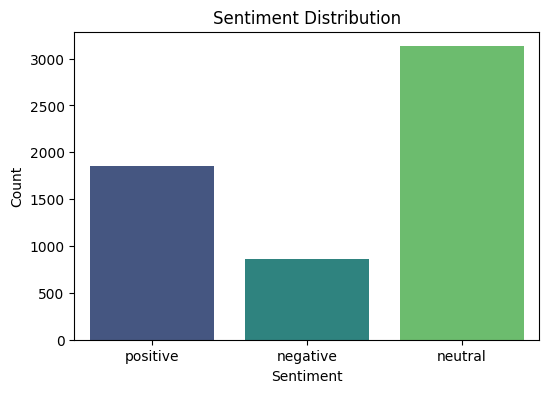

In [2]:
# Exploratory Data Analysis (EDA)
print("\n### Sentiment Distribution ###")
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sentiment', palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


### Sentence Length Analysis ###


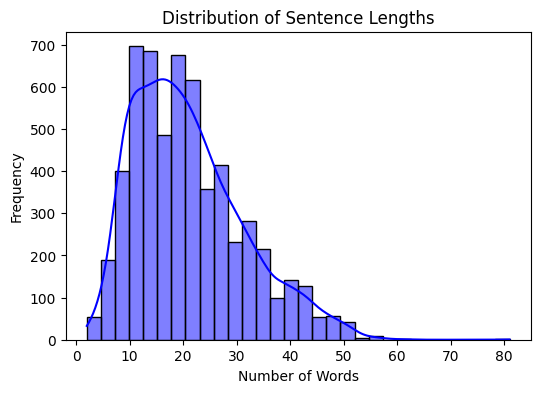

In [3]:
print("\n### Sentence Length Analysis ###")
df['sentence_length'] = df['Sentence'].apply(lambda x: len(x.split()))
plt.figure(figsize=(6, 4))
sns.histplot(df['sentence_length'], kde=True, bins=30, color='blue')
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


In [4]:
# Feature Engineering - Bag of Words
vectorizer_bow = CountVectorizer(max_features=800)
X_bow = vectorizer_bow.fit_transform(df['Sentence']).toarray()

# Feature Engineering - TF-IDF
vectorizer_tfidf = TfidfVectorizer(max_features=800)
X_tfidf = vectorizer_tfidf.fit_transform(df['Sentence']).toarray()

# Bonus: use sentence transformers to create sementic embedings..
X_semantic = #TODO


# Prepare Labels
y = df['Sentiment']

# Split Dataset
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Model Training - Decision Tree (Bag of Words)
print("\n### Decision Tree with Bag of Words ###")
dt_bow = DecisionTreeClassifier(random_state=42)
dt_bow.fit(X_train_bow, y_train)

# Plot the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_bow, max_depth=3, fontsize=10, feature_names=vectorizer_bow.get_feature_names_out(), class_names=dt_bow.classes_, filled=True)
plt.title('Decision Tree (Bag of Words)')
plt.show()

# Evaluation - Bag of Words
y_pred_bow = dt_bow.predict(X_test_bow)
print("Classification Report (Bag of Words):\n", classification_report(y_test, y_pred_bow))

# Model Training - Decision Tree (TF-IDF)
print("\n### Decision Tree with TF-IDF ###")
dt_tfidf = DecisionTreeClassifier(random_state=42)
dt_tfidf.fit(X_train_tfidf, y_train)

# Plot the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_tfidf, max_depth=3, fontsize=10, feature_names=vectorizer_tfidf.get_feature_names_out(), class_names=dt_tfidf.classes_, filled=True)
plt.title('Decision Tree (TF-IDF)')
plt.show()

# Evaluation - TF-IDF
y_pred_tfidf = dt_tfidf.predict(X_test_tfidf)
print("Classification Report (TF-IDF):\n", classification_report(y_test, y_pred_tfidf))

# Summary and Comparison
print("\n### Summary ###")
print("Compare the performance of Bag of Words and TF-IDF features using the metrics.")


SyntaxError: invalid syntax (<ipython-input-4-f88cdd4f6559>, line 10)

# Discussion:
1. What insights can you draw from the EDA?
2. Which feature extraction method performs better? Why?
3. Explore hyperparameter tuning for the Decision Tree model.
4. Implement semantic feature engineering using pre-trained embeddings (bonus).

In [ ]:
#Hyperparameter search example
from sklearn.model_selection import GridSearchCV

# Feature Engineering - TF-IDF
vectorizer_tfidf = TfidfVectorizer(max_features=800)
X_train_tfidf = vectorizer_tfidf.fit_transform(df['Sentence']).toarray()

# Model Training - Decision Tree (Bag of Words)
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Model Training - Decision Tree (TF-IDF)
print("\n### Decision Tree with TF-IDF ###")
dt_tfidf = #TODO:

# Perform GridSearchCV for hyperparameter tuning
grid_search_tfidf = GridSearchCV(dt_tfidf, param_grid, cv=5, scoring='accuracy')

#TODO
# Get the best estimator from the grid search
dt_tfidf_best = grid_search_tfidf.best_estimator_
print("Best hyperparameters (TF-IDF):", grid_search_tfidf.best_params_)